In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Creixement listings 

In [2]:
data = pd.read_csv('listings_clean.csv')
data['host_since'] = pd.to_datetime(data['host_since'], format="%Y-%m-%d")
data['host_timing']=np.ones(len(data))
list_count = data.host_timing.groupby(data.host_since).sum()

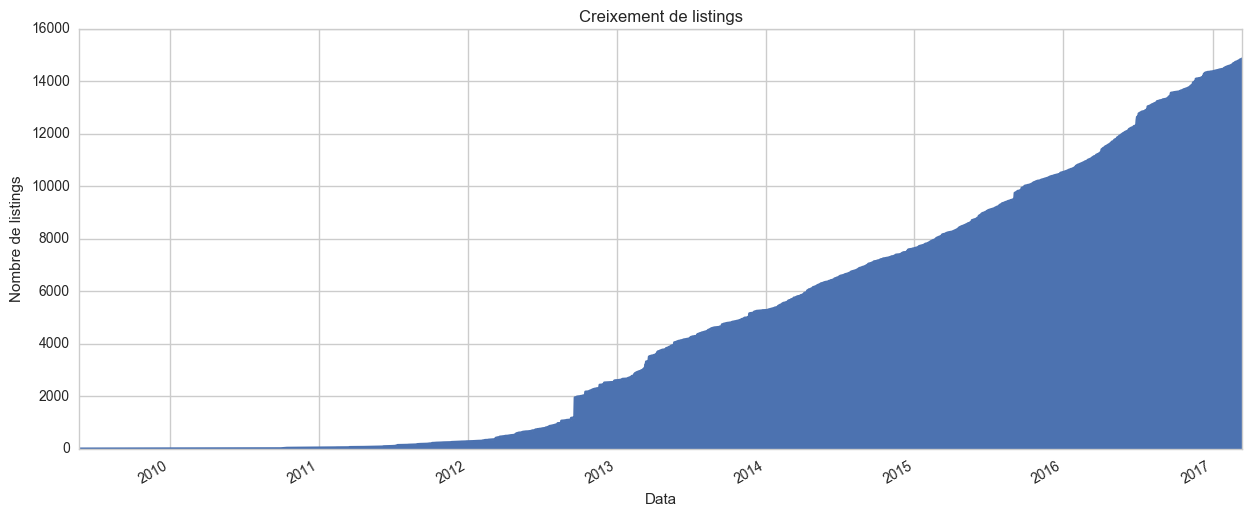

In [3]:
list_grow = list_count.cumsum()
list_grow.plot(kind='area')
plt.title('Creixement de listings')
plt.ylabel('Nombre de listings')
plt.xlabel('Data')

### Resamplig a cada mes

Possiblement necessàri segons el model de forecasting que s'apliqui

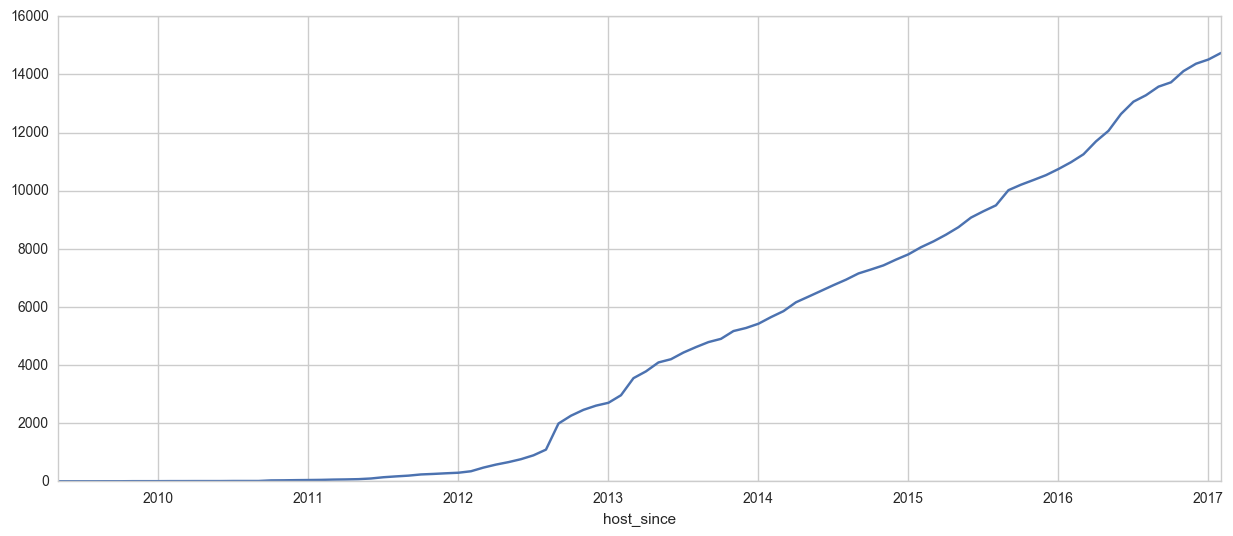

In [4]:
grow_res=list_grow.resample('1m').bfill()
grow_res.dropna(inplace=True)
grow_res.plot()

# Creixement Hosts 

In [5]:
host_since = data[['host_since', 'host_id']]
host_since = host_since.drop_duplicates(['host_id'])
host_since['counts'] = np.ones(len(host_since))

host_since.sort_values(['host_since'], inplace=True)
host_since=host_since.reset_index(drop=True)

host_since = host_since.counts.groupby(host_since.host_since).sum()
host_since = host_since.cumsum()

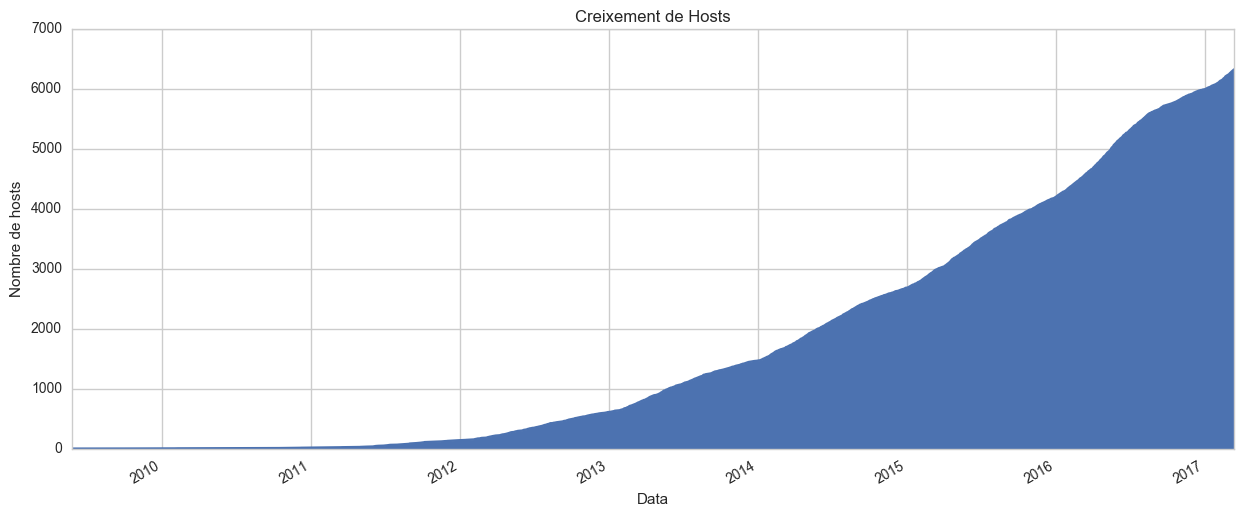

In [6]:
host_since.plot(kind='area')
plt.title('Creixement de Hosts')
plt.ylabel('Nombre de hosts')
plt.xlabel('Data')

### Plot de la proliferació de listings i hosts a la mateixa figura:

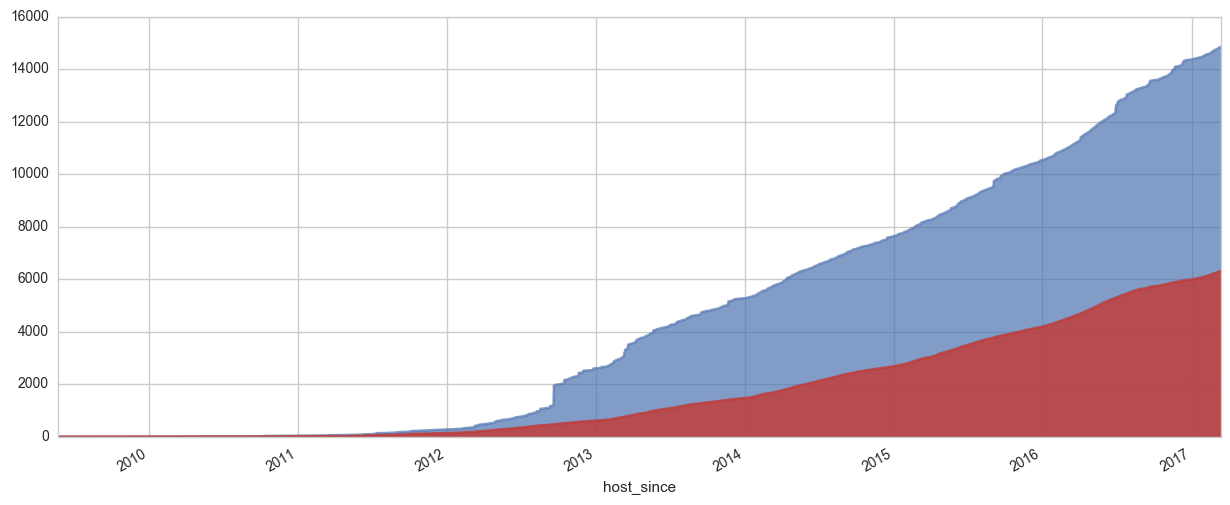

In [7]:
list_grow.plot(kind='area', alpha=0.7)
host_since.plot(kind='area', alpha=0.8, color='#c43733')

Com podem veure al gràfic anterior, la proliferació de hostings i listings no augmenten al mateix rimte. Podem anomenar aquest efecte **THE CALL OF BUSINESS**

Ratio entre nº listings i nº hosts:

In [18]:
ratio = list_grow/host_since

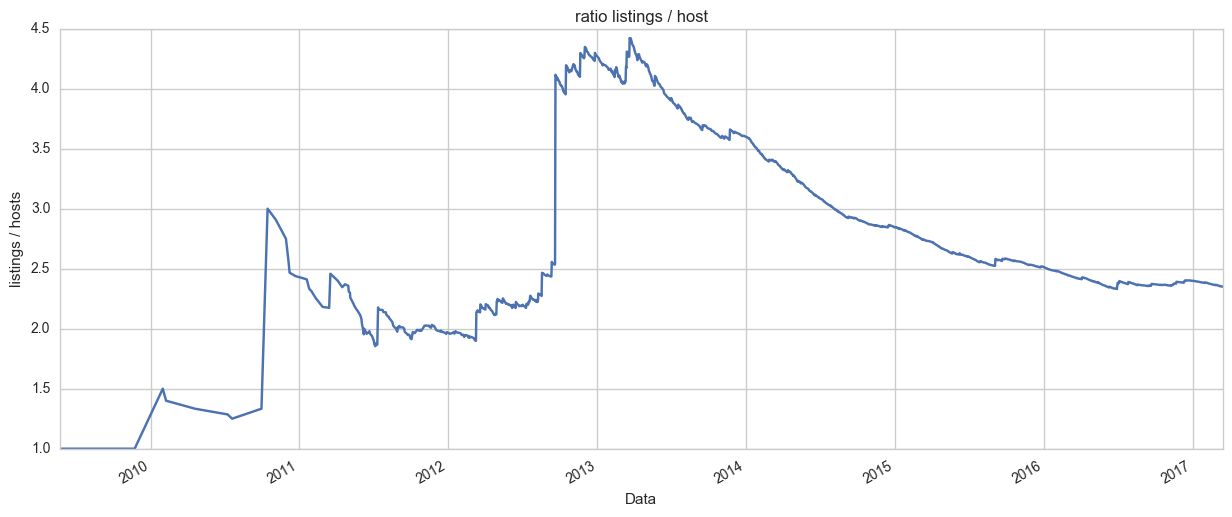

In [19]:
ratio.plot()
plt.title('ratio listings / host')
plt.ylabel('listings / hosts')
plt.xlabel('Data')

# Forecasting

<div class='alert alert-warning'>
**TO DO**: Forecasting amb facebook Prophet de les tendències de proliferació tan de listings com de hostings
</div>

comprovam estacionalitat. Codi de https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

## Estacionalitat i coses de la proliferació de listings

In [49]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window,center=False).mean()
    rolstd = timeseries.rolling(window=window,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original', linewidth=0.8)
    mean = plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=0.8)
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

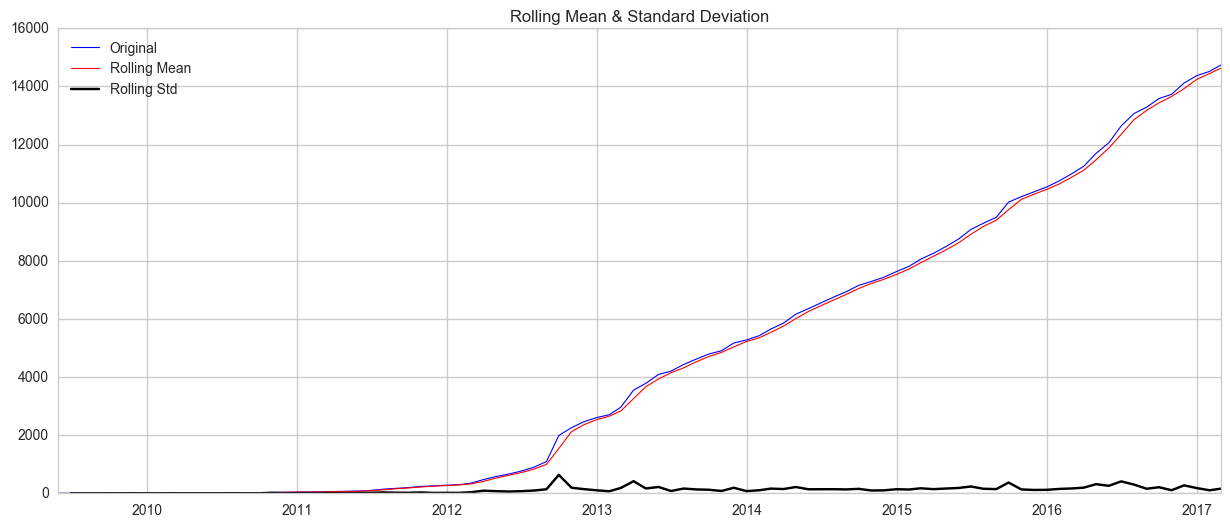

Results of Dickey-Fuller Test:
Test Statistic                  3.390189
p-value                         1.000000
#Lags Used                      1.000000
Number of Observations Used    92.000000
Critical Value (5%)            -2.893508
Critical Value (1%)            -3.503515
Critical Value (10%)           -2.583824
dtype: float64


In [104]:
test_stationarity(grow_res,2)

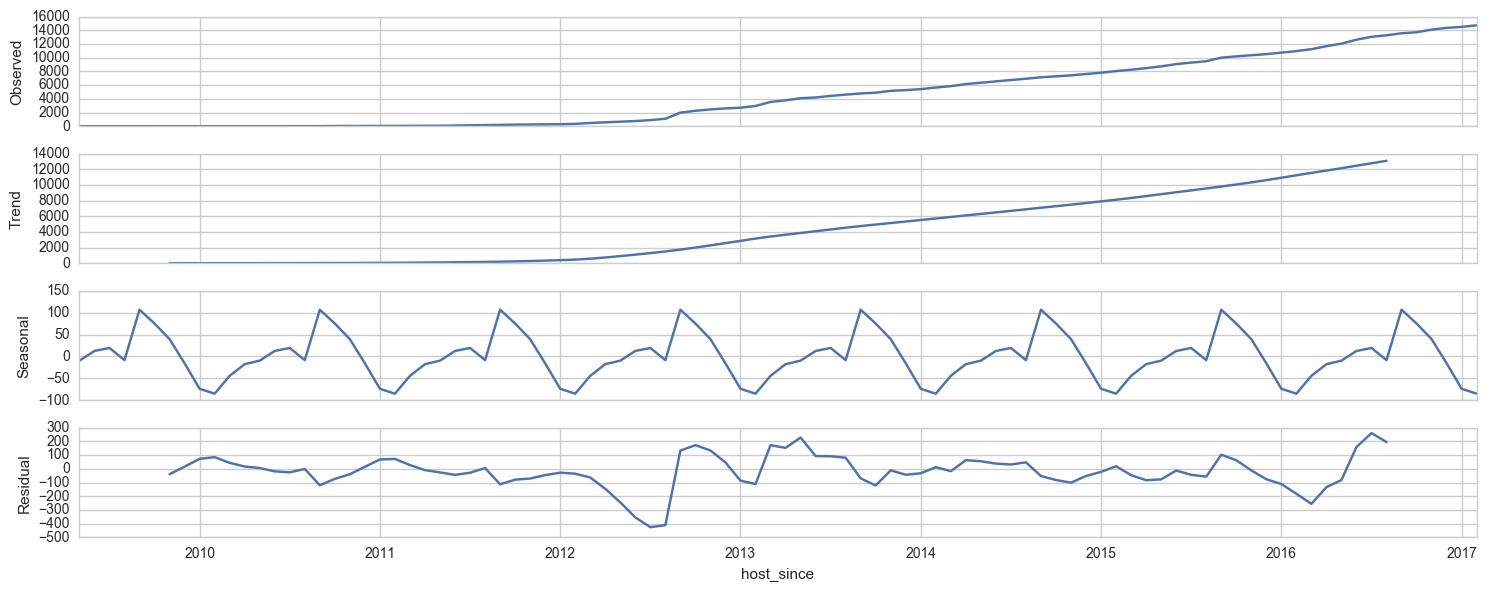

In [105]:
decomposition = seasonal_decompose(grow_res)  
fig = plt.figure()  
fig = decomposition.plot()  

## Estacionalitat i coses de la proliferació de hostings

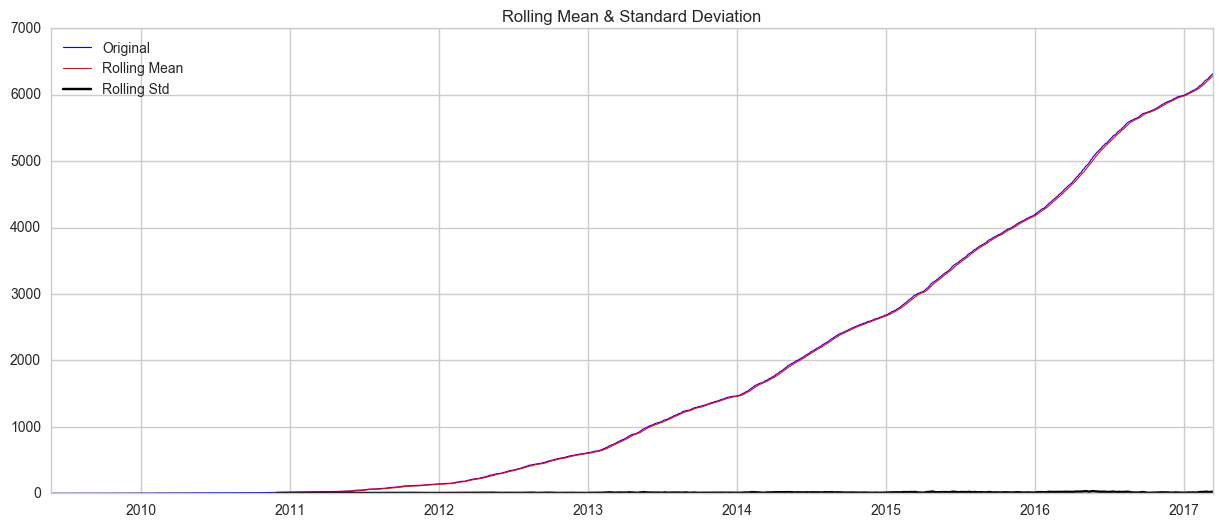

Results of Dickey-Fuller Test:
Test Statistic                    2.984069
p-value                           1.000000
#Lags Used                       15.000000
Number of Observations Used    1810.000000
Critical Value (5%)              -2.863138
Critical Value (1%)              -3.433968
Critical Value (10%)             -2.567621
dtype: float64


In [53]:
test_stationarity(host_since,12)

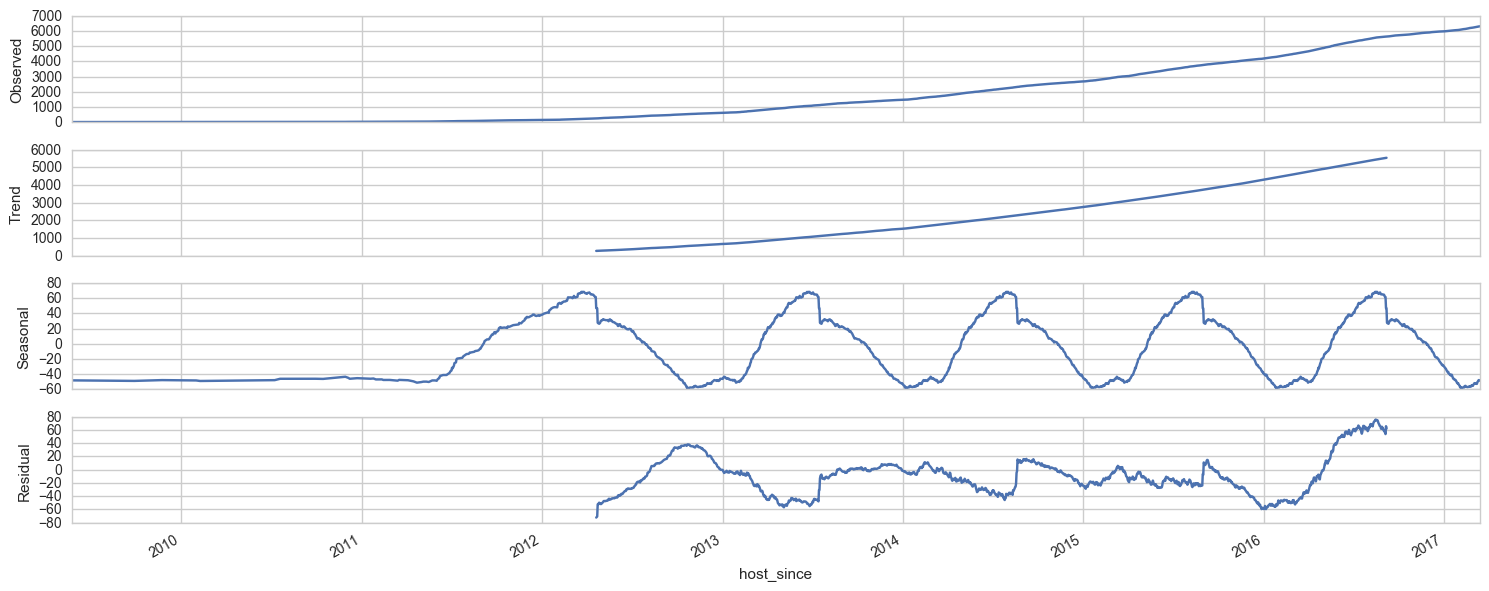

In [59]:
decomposition = seasonal_decompose(host_since, freq=365)#frequència anual
fig = plt.figure()  
fig = decomposition.plot()  